In [1]:
from bokeh.plotting import figure, show
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import math

pd.options.display.float_format = '{:0.2f}'.format

In [2]:
def plotarRegressao(dados, model):  
    def plotar(selection, tipo,legenda):
        X = dados[selection][dados.X]
        y = dados[selection][dados.y]
        Y = model.predict(X)
        r2 = np.corrcoef(y, Y)[0,1]
        se = np.std(y - Y)
        plt.plot(y.tolist(), Y,tipo, markersize=2,label=legenda)
        return [r2,se] 
    model.fit(X=dados[dados.treino][dados.X], y=dados[dados.treino][dados.y])   
    treinor2, treinose = plotar(dados.treino, "ro","Treino")
    tester2,  testese  = plotar(dados.teste,  "bo","Teste")   
    plt.plot(dados[dados.treino][dados.y],dados[dados.treino][dados.y],'orange',label="Esperado")    
    plt.xlabel('Medido')
    plt.ylabel('Predito')
    plt.title(type(model).__name__)
    lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(type(model).__name__, bbox_extra_artists=(lgd,), bbox_inches='tight')    
    
    plt.show()
    print("R2: treino ={r1: 6.2f}, teste ={r2: 6.2f}".format(r1=treinor2,r2=tester2))
    print("Erro quadrado: treino ={r1: 6.2f}, teste ={r2: 6.2f}".format(r1=treinose,r2=testese))   

In [25]:
def plotarGraficoComparacao(dados_treino, dados_teste, xlabel, ylabel, title):
    n_groups = 3

    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, dados_treino, bar_width,
                     alpha=opacity,
                     color='r',
                     label='Treino')

    rects2 = plt.bar(index + bar_width, dados_teste, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Teste')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(index + bar_width/2, ('Regressão Linear', 'MLP', 'SVR'))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [3]:
dados = pd.read_csv('./Concrete_Data_Yeh.csv')
display(dados.describe())

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


In [10]:
dadosNormalizados = dados/dados.mean()
dadosNormalizados.X = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']
dadosNormalizados.y = 'csMPa'
loteria = np.random.random_sample(size=dados.cement.count())
dadosNormalizados.treino = [r < 0.70 for r in loteria]
dadosNormalizados.teste  = [0.70 <= r for r in loteria]

/home/renan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/renan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/home/renan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


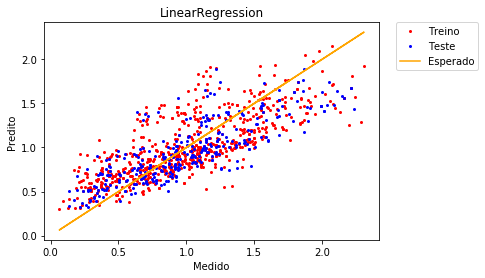

R2: treino =  0.77, teste =  0.82
Erro quadrado: treino =  0.30, teste =  0.27


In [78]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
plotarRegressao(dadosNormalizados, linear)

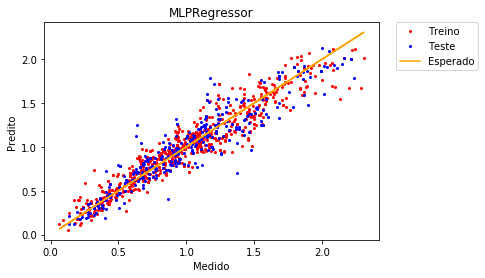

R2: treino =  0.95, teste =  0.94
Erro quadrado: treino =  0.14, teste =  0.17


In [91]:
from sklearn.neural_network import MLPRegressor
neural = MLPRegressor(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(8), activation="logistic", max_iter=10000)
plotarRegressao(dadosNormalizados, neural) 

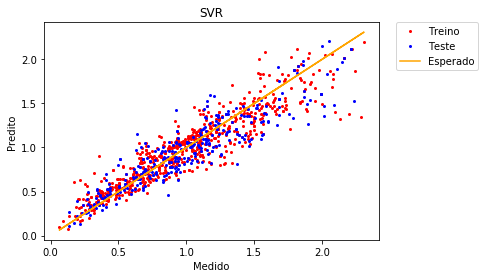

R2: treino =  0.93, teste =  0.92
Erro quadrado: treino =  0.18, teste =  0.19


In [92]:
from sklearn import svm
svr = svm.SVR(kernel='rbf', C=1)
plotarRegressao(dadosNormalizados, svr)

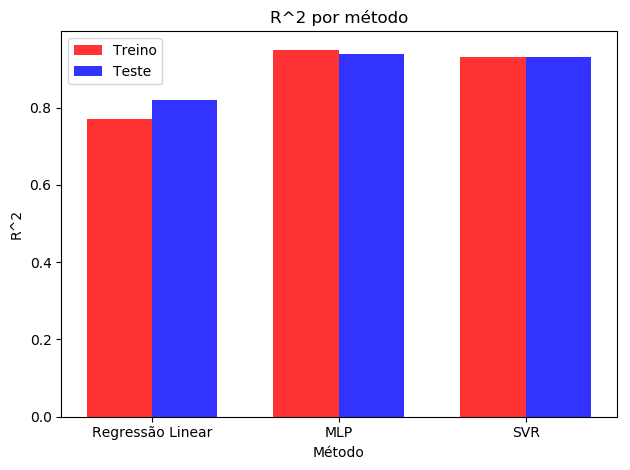

In [28]:
# Platagem comparação R^2
dados_treino_r2 = (0.77, 0.95, 0.93)
dados_teste_r2 = (0.82, 0.94, 0.93)
plotarGraficoComparacao(dados_treino_r2, dados_teste_r2, 'Método', 'R^2', 'R^2 por método')

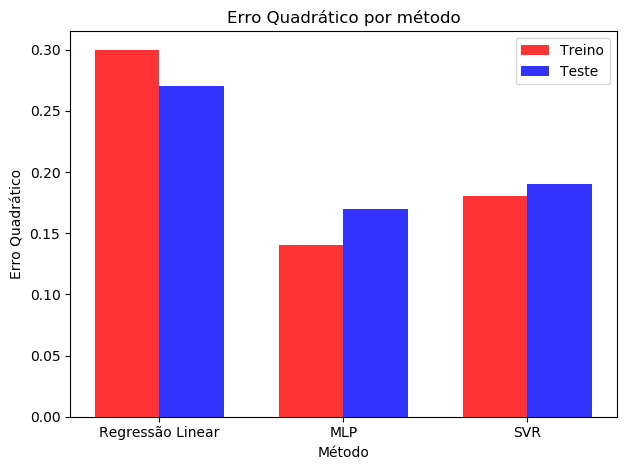

In [29]:
# Platagem comparação EQ
dados_treino_r2 = (0.30, 0.14, 0.18)
dados_teste_r2 = (0.27, 0.17, 0.19)
plotarGraficoComparacao(dados_treino_r2, dados_teste_r2, 'Método', 'Erro Quadrático', 'Erro Quadrático por método')